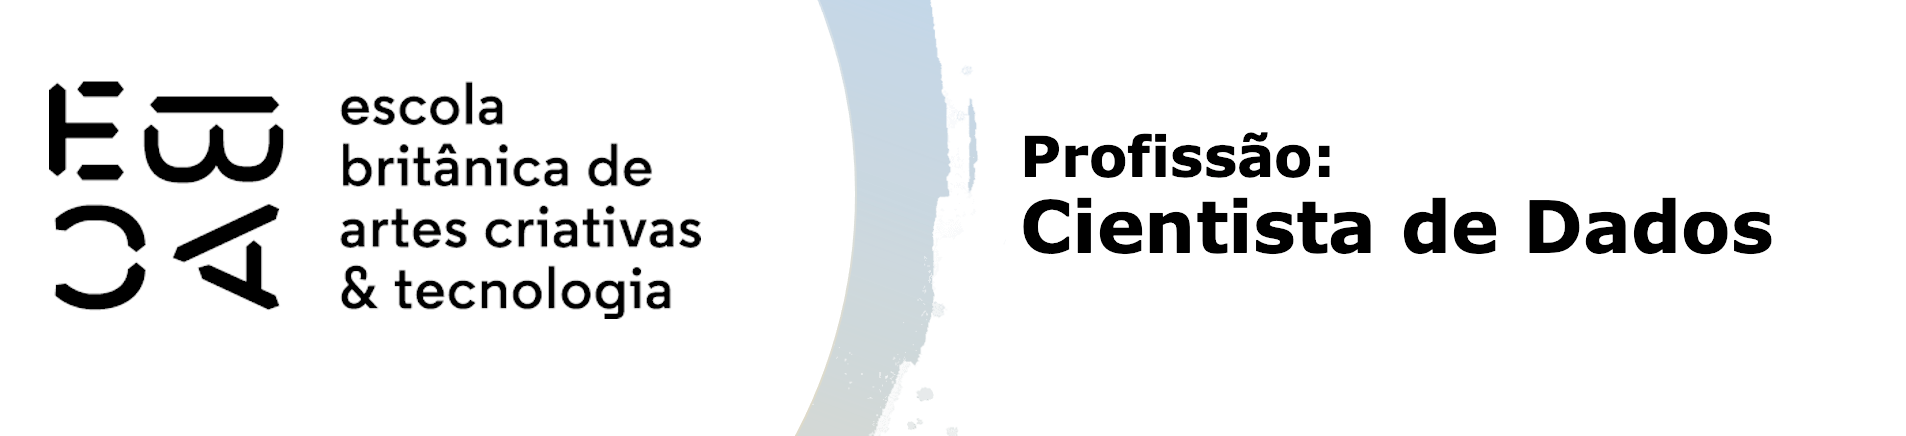

# Métodos hierárquicos de agrupamento - Tarefa

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [77]:
# Selecionando as variáveis quantitativas da base de pinguins e eliminando valores faltantes
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [78]:
# Padronizando as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0


In [79]:
# Fazendo um agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [83]:
# Adicionando uma nova coluna chamada 'grupo' ao DataFrame 'peng_num' para armazenar os rótulos de cluster gerados pelo modelo de clustering.
peng_num['grupo'] = clus.labels_
peng_num


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0


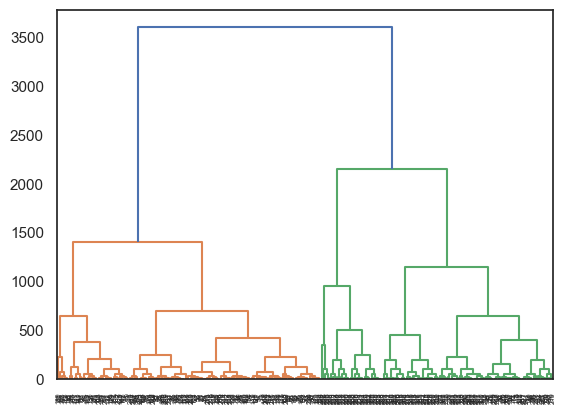

In [88]:
# Fazendo o dendograma
dend = shc.dendrogram(shc.linkage(peng_num, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [89]:
count = peng_num['grupo'].value_counts().sort_index()
count

grupo
0    123
1    165
2     54
Name: count, dtype: int64

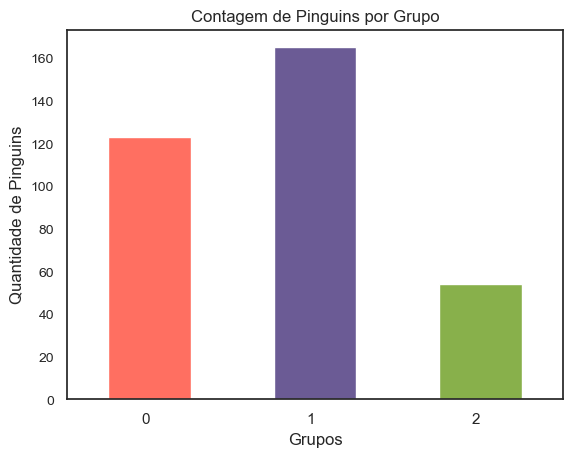

In [90]:
sns.set(style="white")
paleta = sns.color_palette(['#FF6F61', '#6B5B95', '#88B04B'])

count.plot(kind='bar', color=paleta)

plt.xlabel('Grupos')
plt.ylabel('Quantidade de Pinguins')
plt.title('Contagem de Pinguins por Grupo')

plt.xticks(rotation=0, ha='right')
plt.yticks(fontsize=10)

# Exibindo o gráfico
plt.show()


In [91]:
pd.crosstab(peng['species'], peng_num['grupo'])

grupo,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


grupo,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


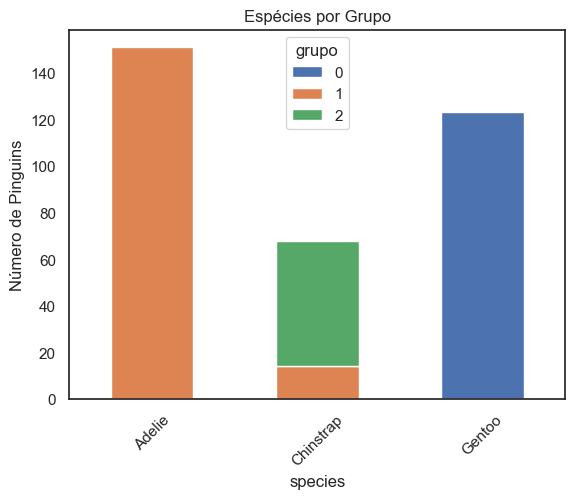

In [92]:
# Criando uma tabela cruzada entre as colunas 'species' e 'grupo'
tabela_cruzada = pd.crosstab(peng['species'], peng_num['grupo'])

ax = tabela_cruzada.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)

plt.ylabel('Número de Pinguins')
plt.title('Espécies por Grupo')

display(tabela_cruzada)

plt.show()

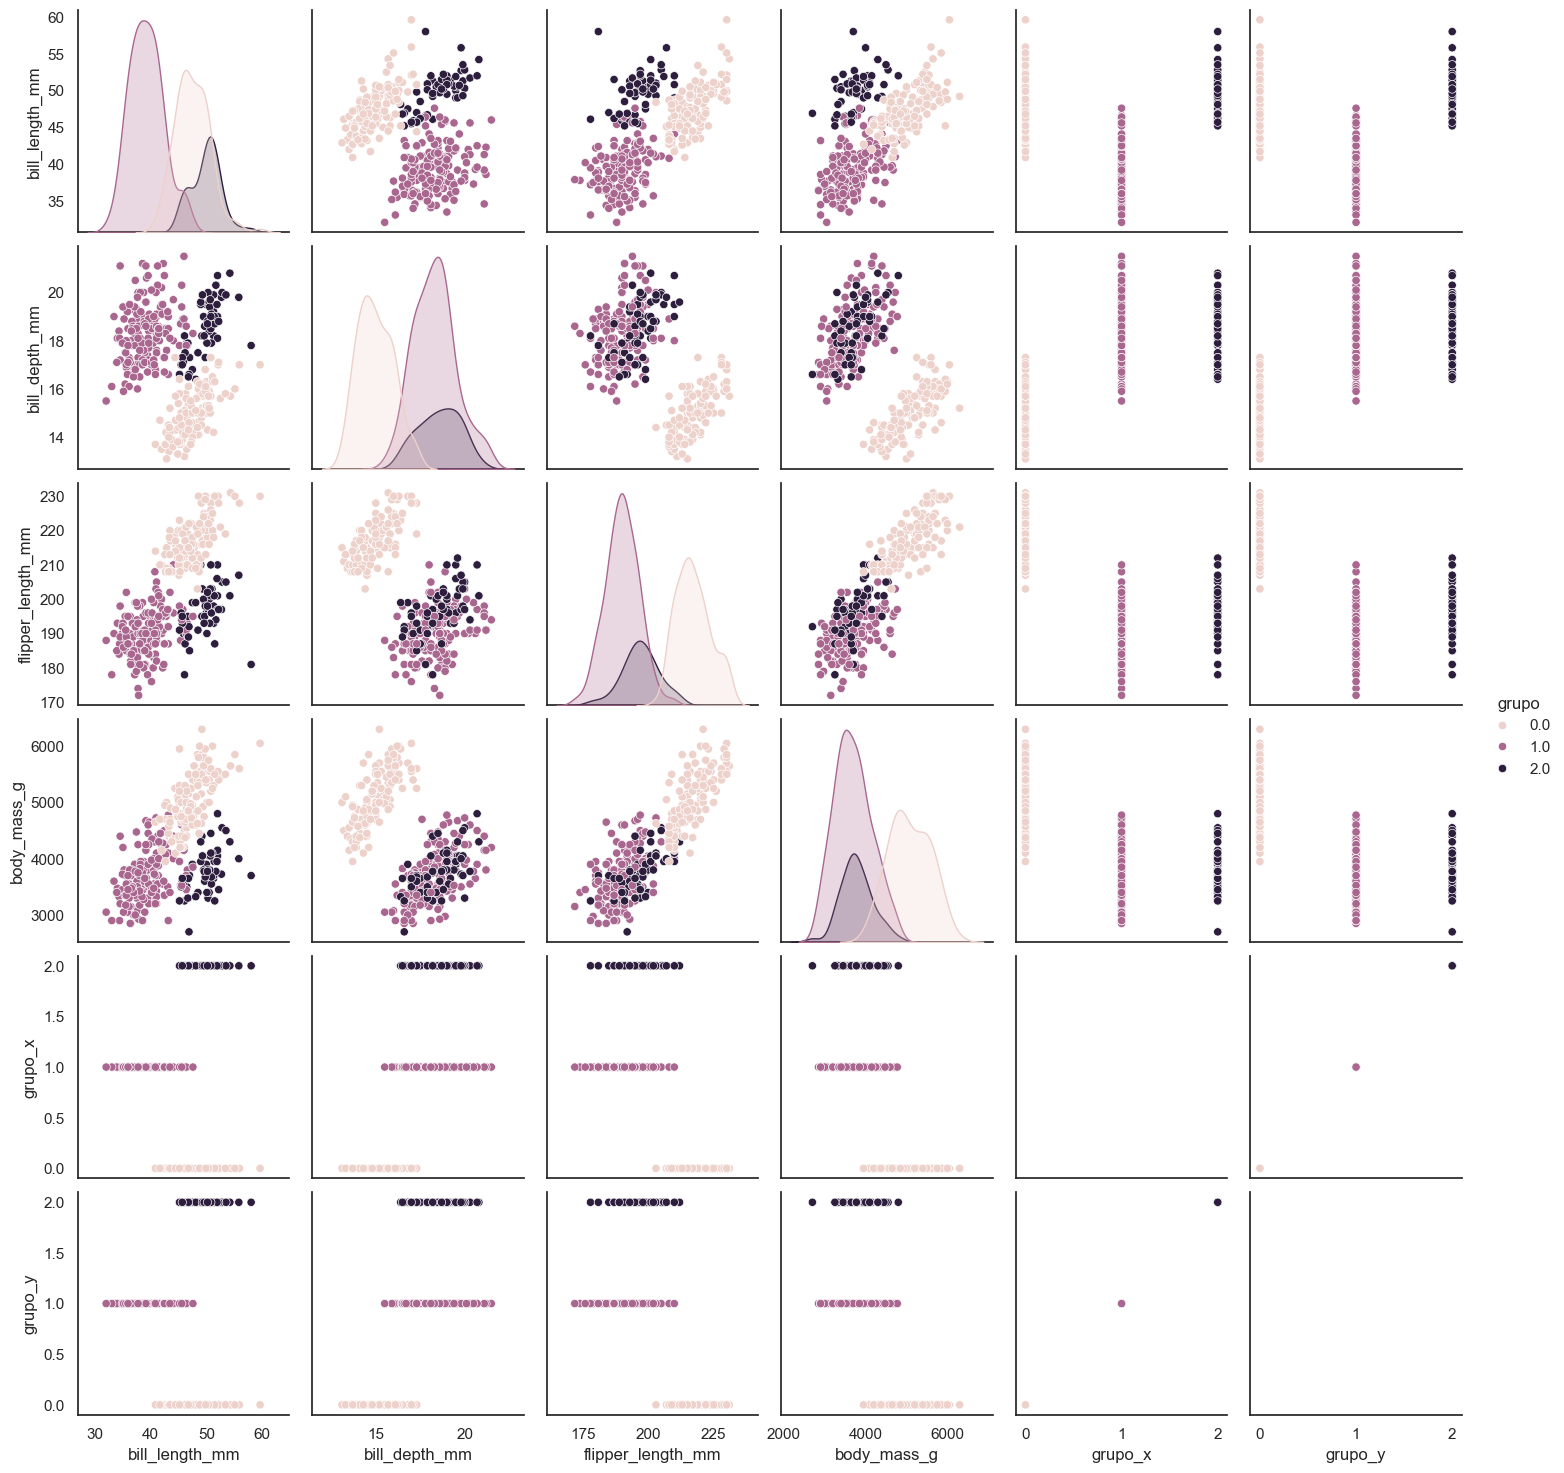

In [93]:
# Visualizando os grupos
sns.pairplot(data=peng, hue='grupo')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [111]:
clus_5 = AgglomerativeClustering(linkage='complete',
                                     distance_threshold=None,
                                     n_clusters=5)
clus_5.fit(peng_pad)
peng_num['grupo_1'] = clus_5.labels_
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,grupo_1,grupo1
id,,,,,,,
0,39.1,18.7,181.0,3750.0,1,4,1
1,39.5,17.4,186.0,3800.0,1,4,1
2,40.3,18.0,195.0,3250.0,1,4,1
4,36.7,19.3,193.0,3450.0,1,4,1
5,39.3,20.6,190.0,3650.0,1,2,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,3,0
340,46.8,14.3,215.0,4850.0,0,3,0
341,50.4,15.7,222.0,5750.0,0,1,0


In [112]:
count_group_1 = peng_num['grupo_1'].value_counts().sort_index()
count_group_1

grupo_1
0    54
1    71
2    69
3    52
4    96
Name: count, dtype: int64

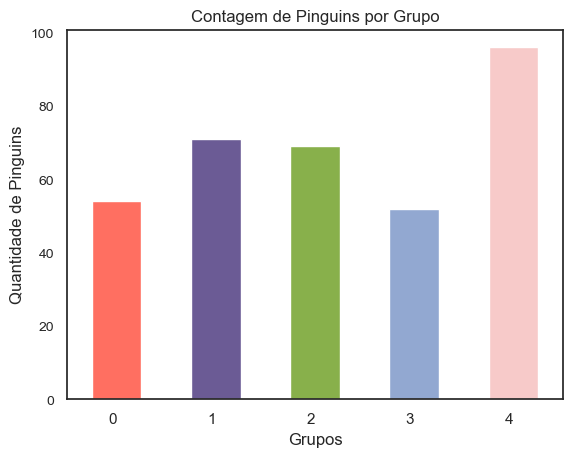

In [113]:
sns.set(style="white")
paleta = sns.color_palette(['#FF6F61', '#6B5B95', '#88B04B', '#92A8D1', '#F7CAC9'])

count_group_1.plot(kind='bar', color=paleta)

plt.xlabel('Grupos')
plt.ylabel('Quantidade de Pinguins')
plt.title('Contagem de Pinguins por Grupo')

plt.xticks(rotation=0, ha='right')
plt.yticks(fontsize=10)

plt.show()


In [114]:
# Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?

peng_species = peng_num.merge(right=peng[['sex', 'species']], how='left', left_index=True, right_index=True)
count_group_1_sex = (peng_species[['grupo_1', 'sex']].value_counts().unstack().fillna(0).astype(int))

display(count_group_1_sex)

sex,Female,Male
grupo_1,,
0,20,34
1,9,61
2,13,55
3,49,0
4,74,18


C:\Users\milla\AppData\Local\Temp\ipykernel_15492\3093091919.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(tab_cruzada_percentual.applymap(lambda x: f'{x:.2f}%'))


species  Adelie         Chinstrap          Gentoo        
sex      Female    Male    Female    Male  Female    Male
grupo1                                                   
0         0.00%   0.00%     0.00%   0.00%  17.42%  18.32%
1        21.92%  21.92%     4.20%   0.00%   0.00%   0.00%
2         0.00%   0.00%     6.01%  10.21%   0.00%   0.00%

<Axes: xlabel='grupo_1'>

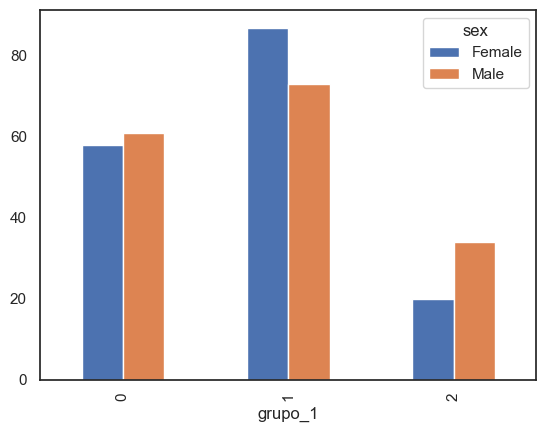

In [110]:
# Tabela cruzada percentual

tab_cruzada_percentual = pd.crosstab(index=[peng_species['grupo1'], peng_species['sex']], columns=peng_species['species'], normalize=True) * 100
tab_cruzada_percentual = tab_cruzada_percentual.unstack().fillna(0)

display(tab_cruzada_percentual.applymap(lambda x: f'{x:.2f}%'))

count_group_1_sex.plot(kind='bar')

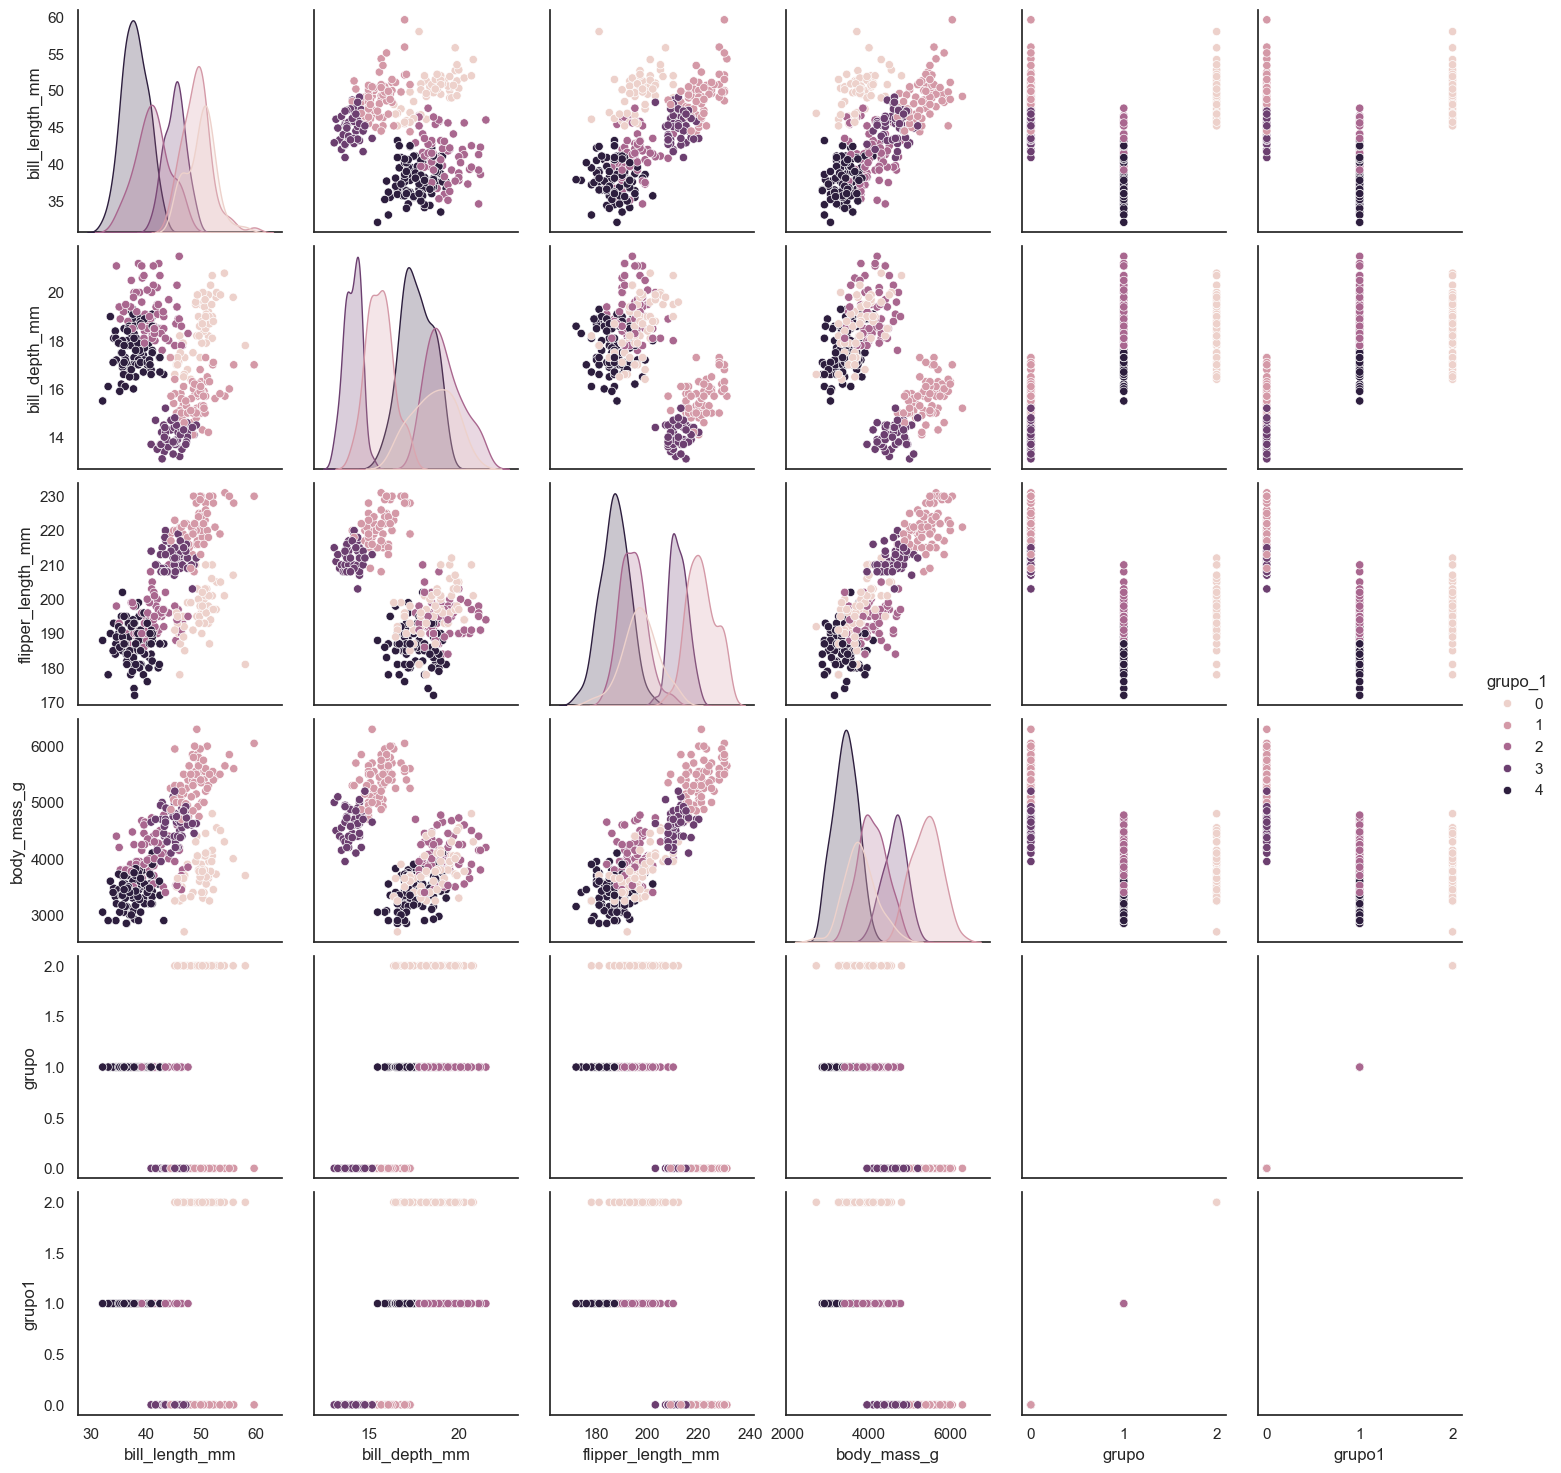

In [120]:
# Visualizando os grupos
sns.pairplot(data=peng_num, hue='grupo_1')

Essa categorização mostra que o agrupamento foi capaz de detectar padrões naturais nos dados, já que os grupos diferenciam os pinguins conforme suas características de espécie e gênero. Isso indica que o agrupamento conseguiu separar os pinguins com base em características biológicas específicas.